# Optimización del modelo Naive Bayes 

Algunas de las estrategias que mejor funcionan para mejorar las métricas del algoritmo Naive-Bayes son las siguientes: 

- Revisar la correlación entre variables: cuando dos variables presentan una fuerte correlación el algoritmo las tendrá en cuenta, duplicando su importancia y por lo tanto empeorando el algoritmo. Es importante eliminar variables con elevada correlación. 
- Evaluación datos desbalanceados


In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# pycaret
from pycaret.classification import *

# datos desbalanceados 
import imblearn
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [2]:
path ='LiverPatient.csv'

all_data =pd.read_csv(path, header =0)
# Add column names 
all_data.columns= ['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'AG', 'Status']

# Transform Gender to categorical 
all_data['Gender'].replace('Female',0 ,inplace=True)
all_data['Gender'].replace('Male',1,inplace=True)

all_data.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,Status
0,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [3]:
# Drop missing values 
all_data = all_data.dropna()

In [4]:
data = np.array(all_data['Status']).copy()
data[data == 1] = 0
data[data == 2] = 1

In [5]:
dataset = all_data
dataset.drop('Status', inplace=True, axis=1)

dataset['Status'] = data.tolist()

dataset.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,Status
0,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
1,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
2,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
3,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0
4,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,0


### 1. Correlación

En el algoritmo Naive-Bayes el nombre hace referencia a que asume independencia entre variables. Esto puede tener un efecto positivo si las variables que están correlacionadas son buenos predictores. Revisando los resultados del EDA observamos que las siguientes parejas de variables son las que presentan mayor correlación: 
- TB y DB 
- Sgot y Sgpt

In [6]:
# eliminar una de las variables de las parejas 
new_data = dataset.drop('TB', axis=1)


In [76]:
# eliminar una de las variables de las parejas 
new_data = new_data.drop('Sgot', axis=1)

In [7]:
new_data.head()


,Age,Gender,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,Status
0,62,1,5.5,699,64,100,7.5,3.2,0.74,0
1,62,1,4.1,490,60,68,7.0,3.3,0.89,0
2,58,1,0.4,182,14,20,6.8,3.4,1.00,0
3,72,1,2.0,195,27,59,7.3,2.4,0.40,0
4,46,1,0.7,208,19,14,7.6,4.4,1.30,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [9]:
labels = new_data['Status']
labels = labels.astype('int64')


In [10]:
mydata_train, mydata_test, labels_train, labels_test = train_test_split(new_data.loc[:,'Age':'AG'], labels, test_size=0.33,random_state=2)


In [11]:
print ('Nº de observaciones de entrenamiento:', mydata_train.shape)
print ('Etiquetas para los datos de entrenamiento:', labels_train.shape)
print (' ')
print ('Nº de observaciones de prueba:', mydata_test.shape)
print ('Etiquetas para los datos de entrenamiento:', labels_test.shape)

Nº de observaciones de entrenamiento: (387, 9)
Etiquetas para los datos de entrenamiento: (387,)
 
Nº de observaciones de prueba: (191, 9)
Etiquetas para los datos de entrenamiento: (191,)


In [12]:
gnb = GaussianNB()
y_pred = gnb.fit(mydata_train, labels_train).predict(mydata_test)

In [13]:
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(labels_test, y_pred)}")

Accuracy of the classifier is: 0.5654450261780105


In [14]:
from sklearn.metrics import precision_score

# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(labels_test, y_pred)}")

Precision Score of the classifier is: 0.36507936507936506


In [15]:
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(labels_test, y_pred)}")

Recall Score of the classifier is: 0.9387755102040817


In [16]:
# Importing all necessary libraries
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(labels_test, y_pred)}")

F1 Score of the classifier is: 0.5257142857142857


AUC for our classifier is: 0.6876976142569704


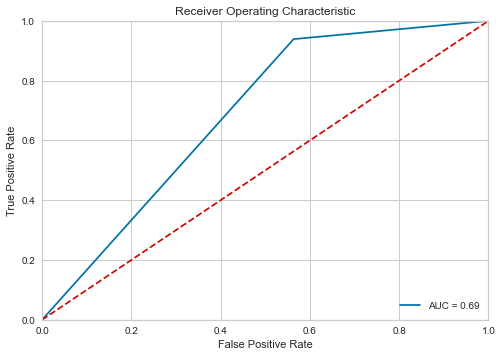

In [17]:
from sklearn.metrics import roc_curve, auc

class_probabilities = gnb.predict_proba(mydata_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(labels_test, y_pred)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [18]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(labels_test, y_pred)
# Printing kappa
print(f"Kappa for our classifier is: {kappa}")

Kappa for our classifier is: 0.24785311002514587


<AxesSubplot:>

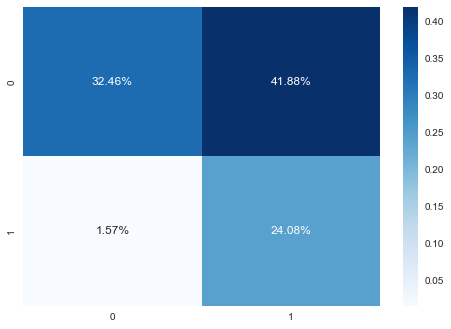

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(labels_test, y_pred)
ac = accuracy_score(labels_test,y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

### 2. Datos desbalanceados

Se prueban distintas técnicas de corrección de datos desbalanceados. 

In [20]:
# random oversampling 
oversample = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversample.fit_resample(all_data.iloc[:,0:10], all_data['Status'])
data_oversampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
data_oversampled.columns = all_data.columns
data_oversampled['Status'].value_counts()

0    413
1    413
Name: Status, dtype: int64

In [21]:
# Random undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = undersample.fit_resample(all_data.iloc[:,0:10], all_data['Status'])
data_undersampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
data_undersampled.columns = all_data.columns
data_undersampled['Status'].value_counts()

0    165
1    165
Name: Status, dtype: int64

In [22]:
# NearMiss
nm = NearMiss()

x_nm, y_nm = nm.fit_resample(all_data.iloc[:,0:10], all_data['Status'])

data_nm = pd.concat([pd.DataFrame(x_nm), pd.DataFrame(y_nm)], axis=1)
data_nm.columns = all_data.columns
data_nm['Status'].value_counts()

0    165
1    165
Name: Status, dtype: int64

In [93]:
#SMOTE
sm = SMOTE()
x_sm, y_sm = sm.fit_resample(all_data.iloc[:,0:10], all_data['Status'])
data_sm = pd.concat([pd.DataFrame(x_sm), pd.DataFrame(y_sm)], axis=1)
data_sm.columns = all_data.columns
data_sm['Status'].value_counts()

0    413
1    413
Name: Status, dtype: int64

In [106]:
# modificando esto se prueban las distinas aproximaciones
technique = data_undersampled
# dataset sin la variable objetivo
data_st = technique.drop(['Status'], axis=1)
data_st

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG
0,46,1,0.6,0.2,290,26,21,6.0,3.0,1.00
1,40,1,3.6,1.8,285,50,60,7.0,2.9,0.70
2,45,1,20.2,11.7,188,47,32,5.4,2.3,0.70
3,33,1,1.5,7.0,505,205,140,7.5,3.9,1.00
4,32,1,30.5,17.1,218,39,79,5.5,2.7,0.90
5,18,1,1.4,0.6,215,440,850,5.0,1.9,0.60
6,54,1,0.8,0.2,218,20,19,6.3,2.5,0.60
7,42,1,8.9,4.5,272,31,61,5.8,2.0,0.50
8,46,0,0.8,0.2,185,24,15,7.9,3.7,0.80
9,23,1,1.0,0.3,212,41,80,6.2,3.1,1.00


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [108]:
labels = new_data['Status']
labels = labels.astype('int64')


In [109]:
mydata_train, mydata_test, labels_train, labels_test = train_test_split(new_data.loc[:,'Age':'AG'], labels, test_size=0.33,random_state=2)


In [110]:
gnb = GaussianNB()
y_pred = gnb.fit(mydata_train, labels_train).predict(mydata_test)

In [111]:
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(labels_test, y_pred)}")

Accuracy of the classifier is: 0.5654450261780105


In [112]:
from sklearn.metrics import precision_score

# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(labels_test, y_pred)}")

Precision Score of the classifier is: 0.36507936507936506


In [113]:
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(labels_test, y_pred)}")

Recall Score of the classifier is: 0.9387755102040817


In [114]:
# Importing all necessary libraries
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(labels_test, y_pred)}")

F1 Score of the classifier is: 0.5257142857142857


AUC for our classifier is: 0.6876976142569704


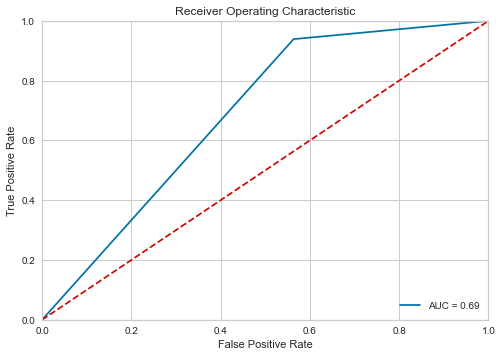

In [115]:
from sklearn.metrics import roc_curve, auc

class_probabilities = gnb.predict_proba(mydata_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(labels_test, y_pred)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [116]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(labels_test, y_pred)
# Printing kappa
print(f"Kappa for our classifier is: {kappa}")

Kappa for our classifier is: 0.24785311002514587


<AxesSubplot:>

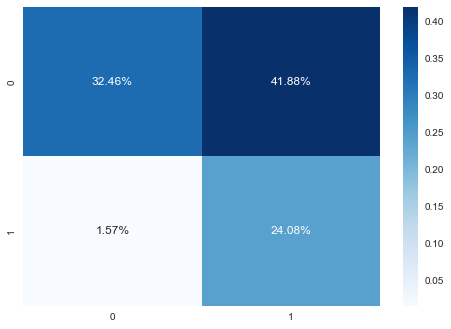

In [117]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(labels_test, y_pred)
ac = accuracy_score(labels_test,y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')